In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\zeyne\OneDrive\Desktop\merged_all_months.csv"

df = pd.read_csv(file_path)

df.head()


,date,hour,route_code,stop_code,passenger_count,vehicle_type,district,is_outlier,is_peak_hour,day_of_week,is_weekend,mean_passenger_by_route_hour,month
0,2024-08-01,0,MESCIDI SELAM-ARNAVUTKOY-ISTANBUL HAVA LIMANI,OTOYOL,1,1,ATASEHIR,0,0,3,0,1.782609,bilinmeyen_ay
1,2024-08-01,0,MECIDIYEKOY-ISTANBUL HAVALIMANI,OTOYOL,1,1,ATASEHIR,0,0,3,0,1.200000,bilinmeyen_ay
2,2024-08-01,0,KOC UNV. RUMELIFENER KAMPUSU - TAKSIM,OTOYOL,3,1,ATASEHIR,0,0,3,0,1.666667,bilinmeyen_ay
3,2024-08-01,0,HACI OSMAN METRO - RUMELI FENERI,OTOYOL,1,1,ATASEHIR,0,0,3,0,1.538462,bilinmeyen_ay
4,2024-08-01,0,USKUDAR-GUZELTEPE-UMRANIYE DEVLET HASTANESI,OTOYOL,3,1,BAKIRKOY,0,0,3,0,4.258065,bilinmeyen_ay


Kolon Bazlı Genel Histogramlar

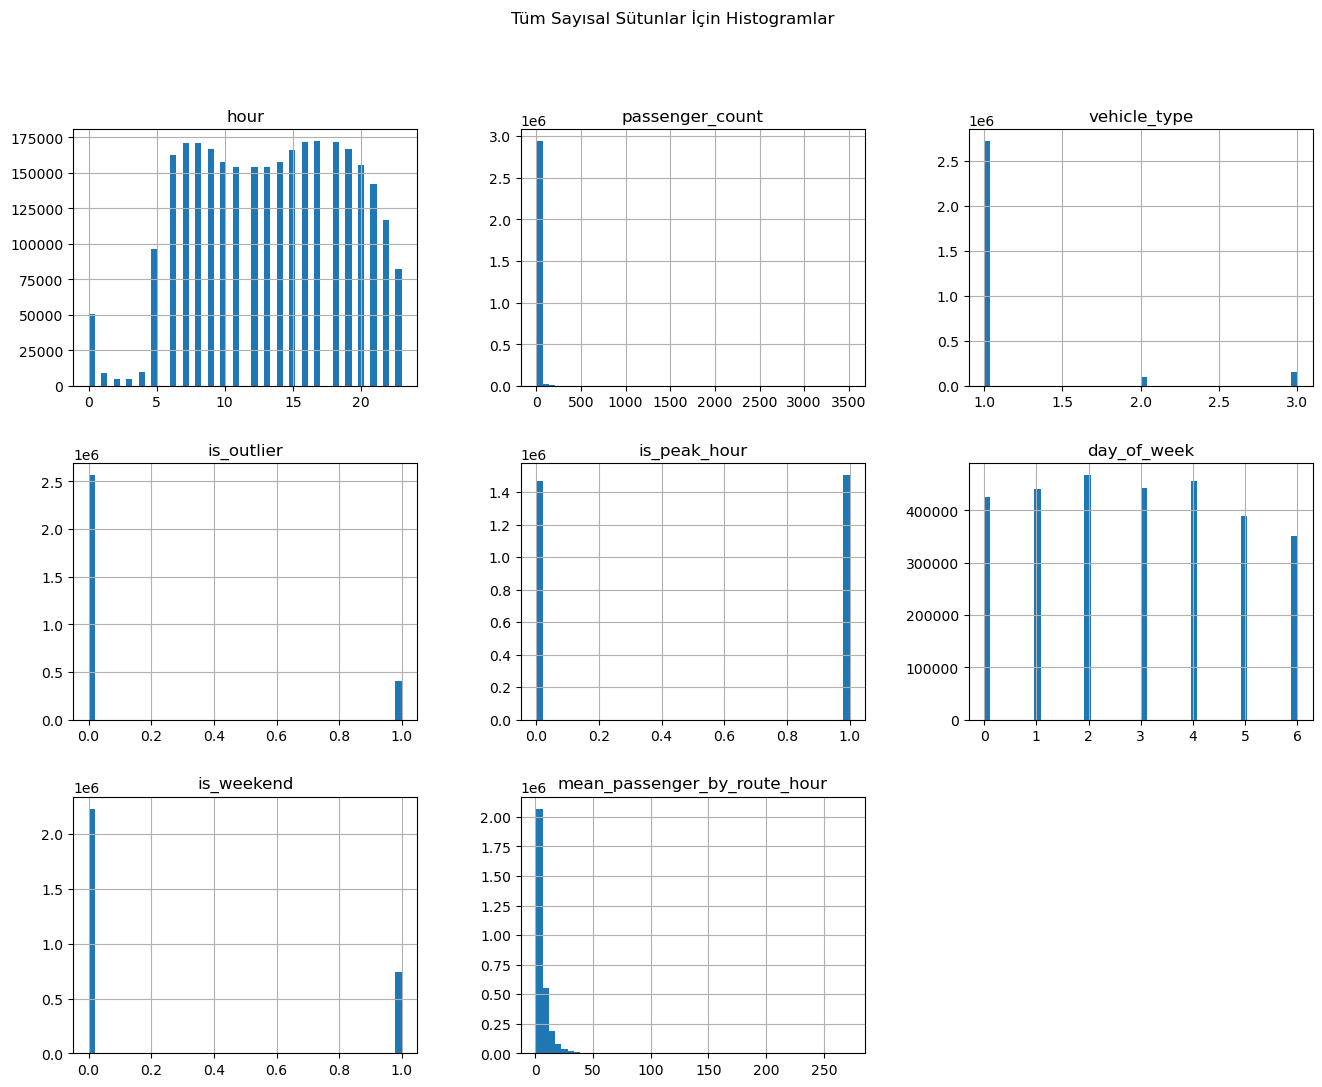

In [2]:
df.hist(figsize=(16,12), bins=50)
plt.suptitle("Tüm Sayısal Sütunlar İçin Histogramlar")
plt.show()


 Yolcu Sayısı KDE Grafiği

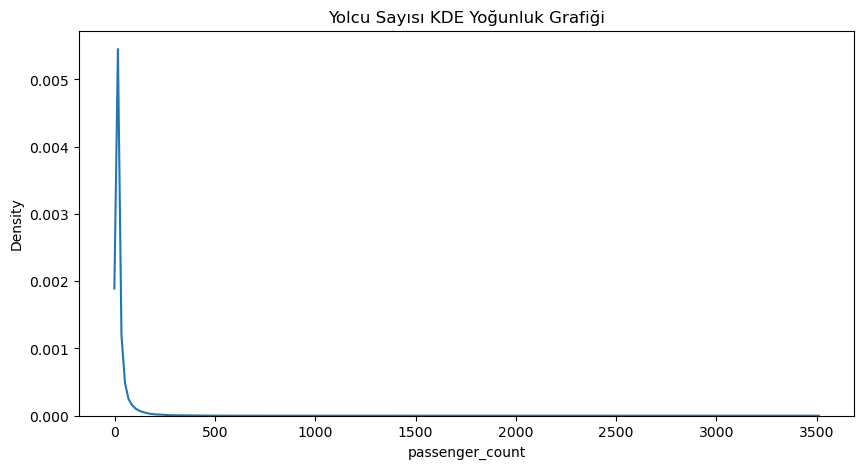

In [3]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['passenger_count'])
plt.title("Yolcu Sayısı KDE Yoğunluk Grafiği")
plt.show()


Saat – Ortalama Yolcu Dağılımı

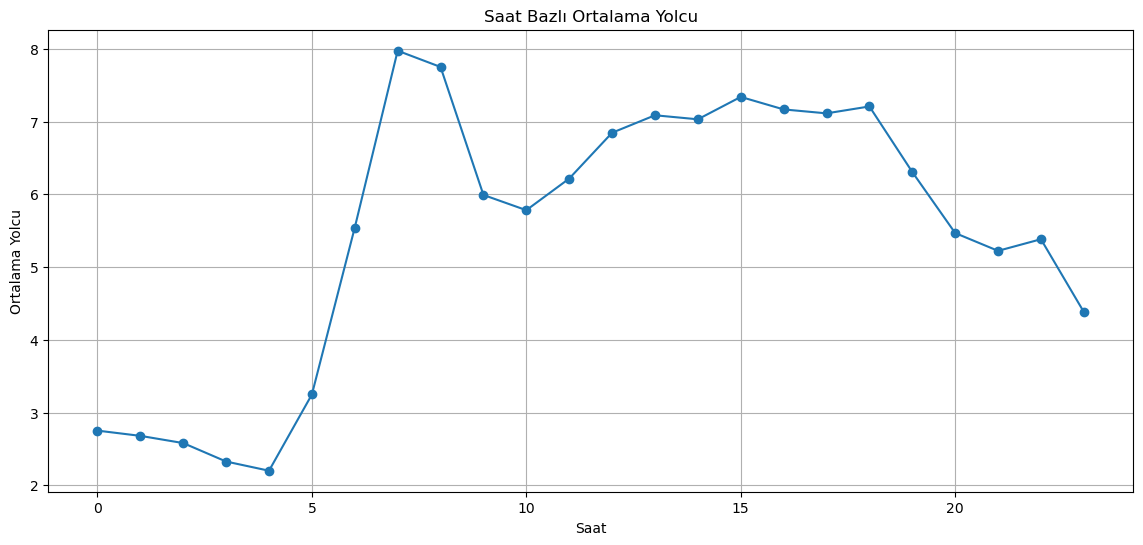

In [4]:
hour_mean = df.groupby("hour")["passenger_count"].mean()

plt.figure(figsize=(14,6))
plt.plot(hour_mean.index, hour_mean.values, marker="o")
plt.title("Saat Bazlı Ortalama Yolcu")
plt.xlabel("Saat")
plt.ylabel("Ortalama Yolcu")
plt.grid()
plt.show()


 Gün – Ortalama Yolcu

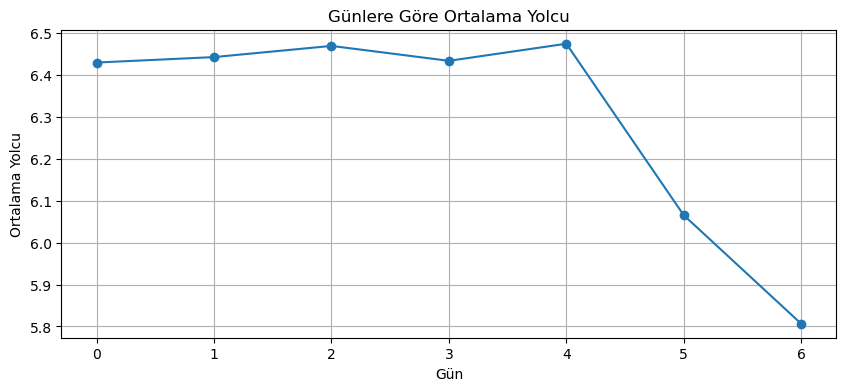

In [5]:
day_mean = df.groupby("day_of_week")["passenger_count"].mean()

plt.figure(figsize=(10,4))
plt.plot(day_mean.index, day_mean.values, marker="o")
plt.title("Günlere Göre Ortalama Yolcu")
plt.xlabel("Gün")
plt.ylabel("Ortalama Yolcu")
plt.grid()
plt.show()


 Peak Hour – Yolcu Sayısı Karşılaştırma

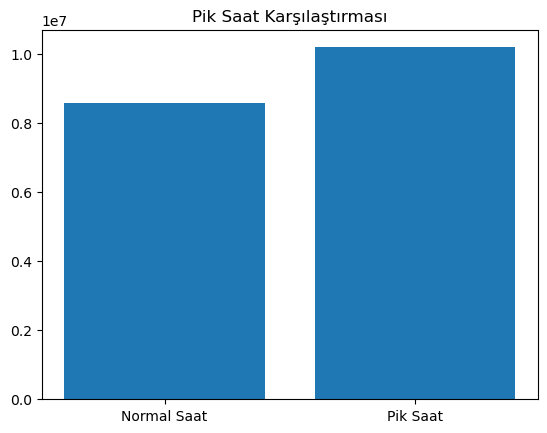

In [6]:
peak = df.groupby("is_peak_hour")["passenger_count"].sum()

plt.bar(["Normal Saat", "Pik Saat"], peak.values)
plt.title("Pik Saat Karşılaştırması")
plt.show()


Ulaşım Türü – Ortalama Yolcu7) Ulaşım Türü – Ortalama Yolcu

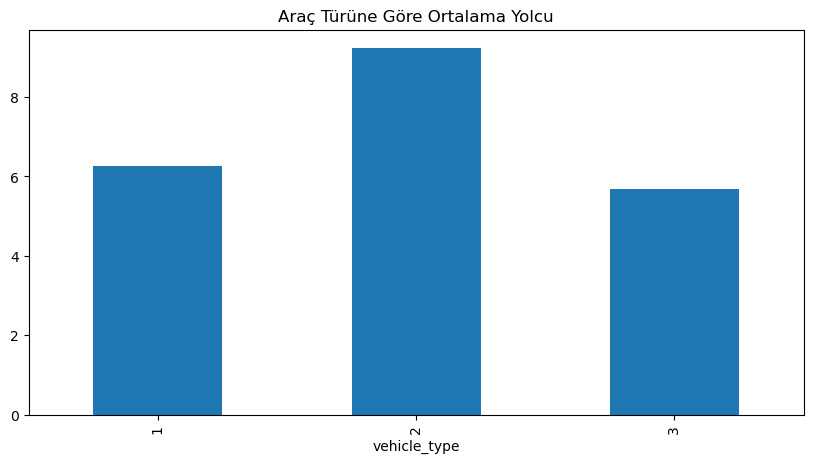

In [8]:
vt_mean = df.groupby("vehicle_type")["passenger_count"].mean()

plt.figure(figsize=(10,5))
vt_mean.plot(kind="bar")
plt.title("Araç Türüne Göre Ortalama Yolcu")
plt.show()


In [ ]:
 District Bazlı Kutu Grafiği (Boxplot)

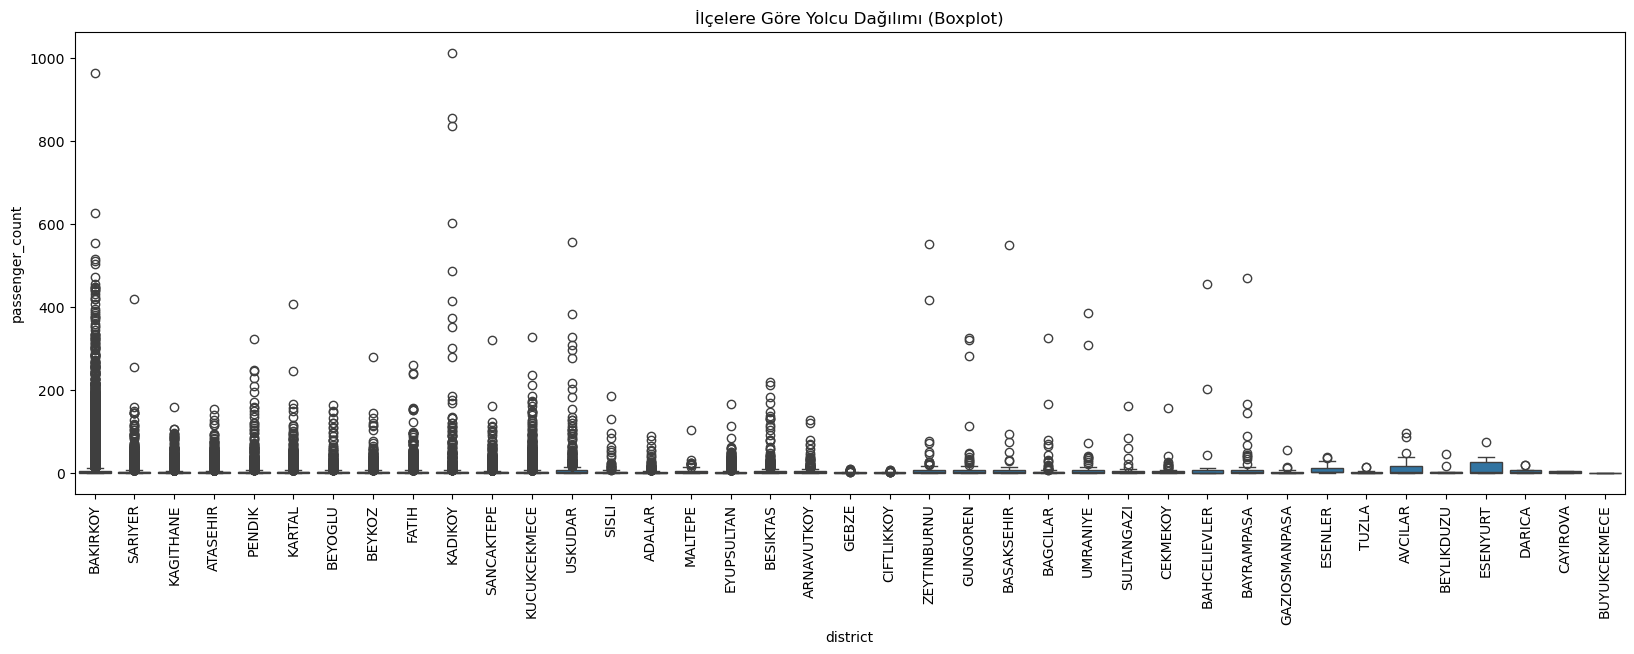

In [7]:
plt.figure(figsize=(20,6))
sns.boxplot(x="district", y="passenger_count", data=df.sample(100000))
plt.xticks(rotation=90)
plt.title("İlçelere Göre Yolcu Dağılımı (Boxplot)")
plt.show()


9-) Vehicle Type – Hour Heatmap

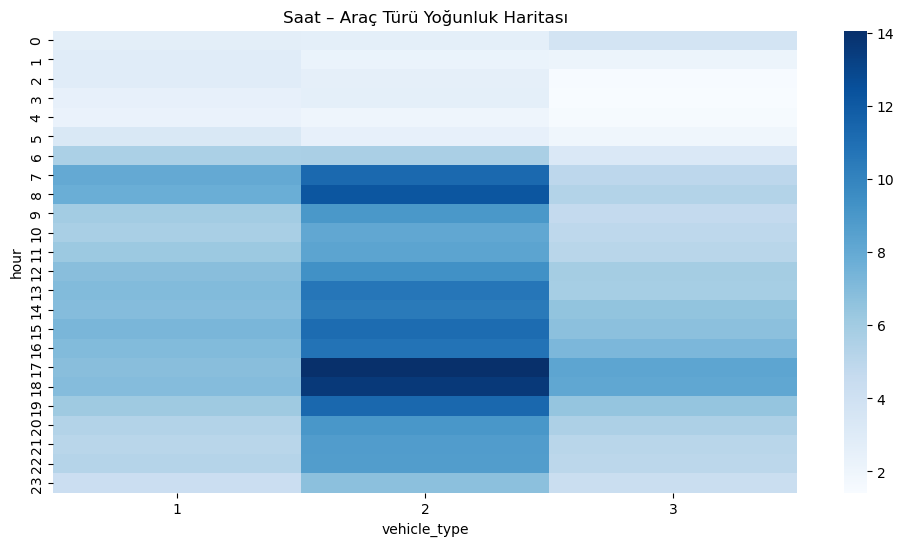

In [8]:
pivot = df.pivot_table(values="passenger_count",
                       index="hour",
                       columns="vehicle_type",
                       aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Saat – Araç Türü Yoğunluk Haritası")
plt.show()


District – Vehicle Type Heatmap

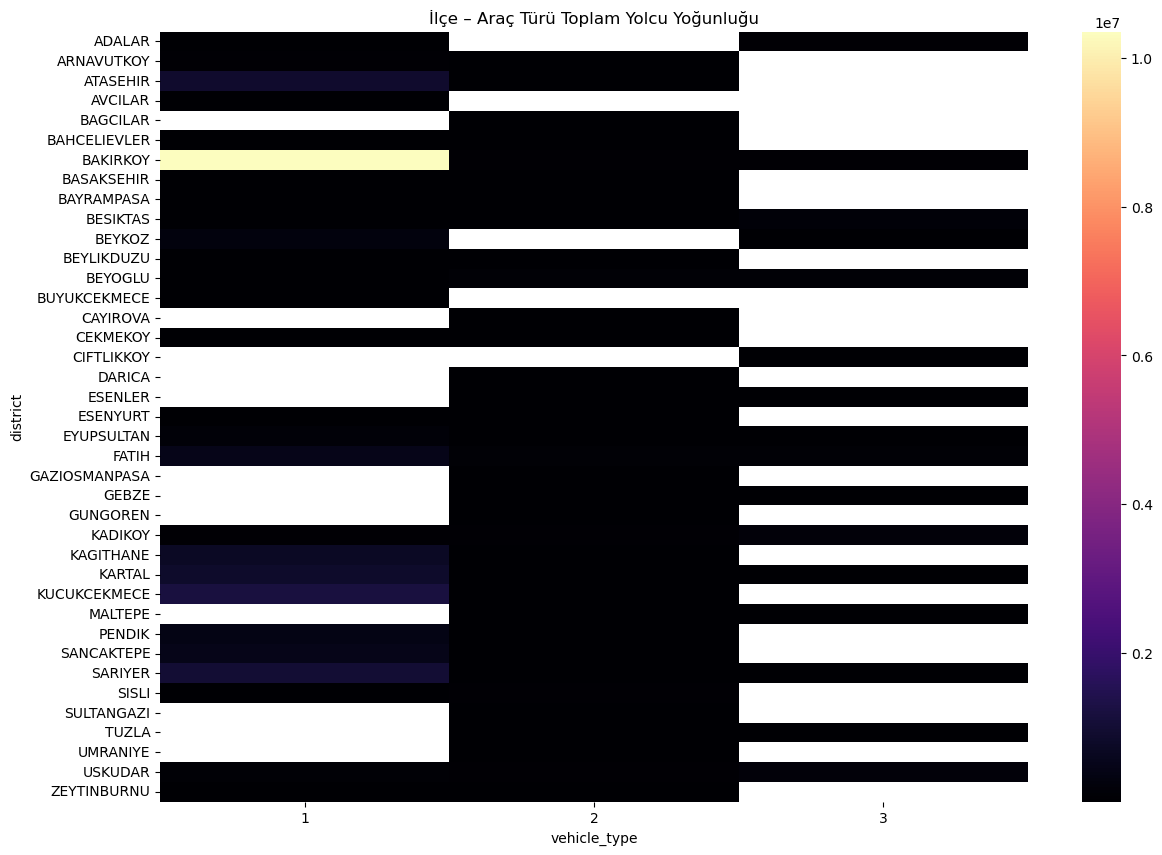

In [11]:
pivot2 = df.pivot_table(values="passenger_count",
                        index="district",
                        columns="vehicle_type",
                        aggfunc="sum")

plt.figure(figsize=(14,10))
sns.heatmap(pivot2, cmap="magma")
plt.title("İlçe – Araç Türü Toplam Yolcu Yoğunluğu")
plt.show()


 Route Code – Yolcu Sayısı (Top 30)

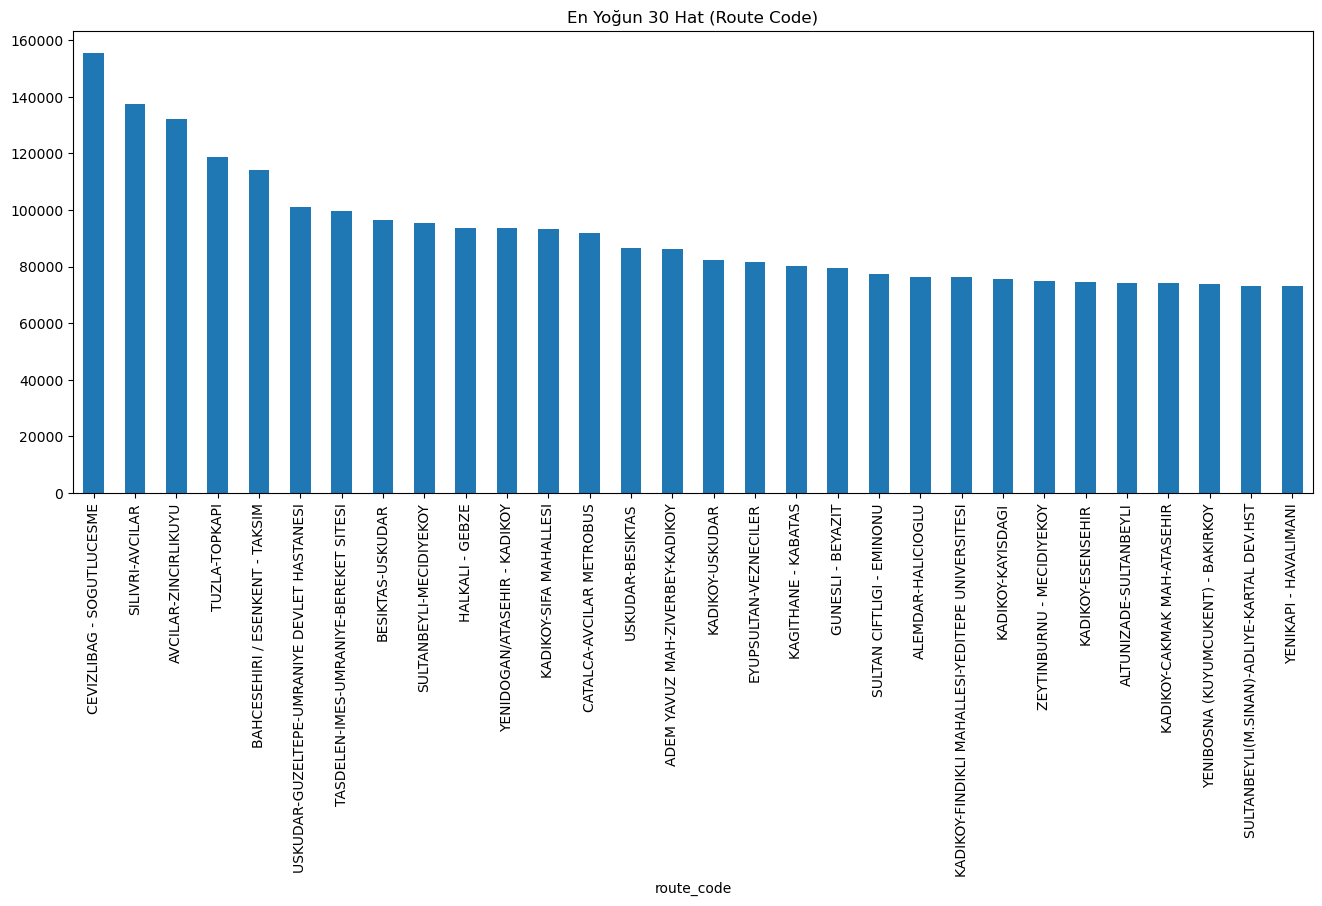

In [9]:
top_routes = df.groupby("route_code")["passenger_count"].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(16,6))
top_routes.plot(kind="bar")
plt.title("En Yoğun 30 Hat (Route Code)")
plt.xticks(rotation=90)
plt.show()


Stop Code – Yolcu Dağılımı

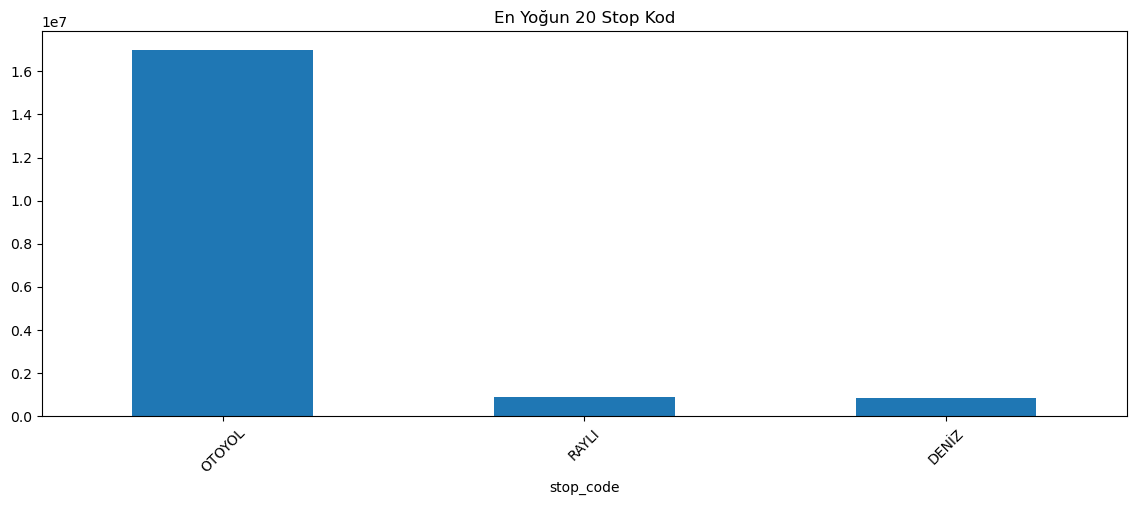

In [10]:
stop_sum = df.groupby("stop_code")["passenger_count"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14,5))
stop_sum.plot(kind="bar")
plt.title("En Yoğun 20 Stop Kod")
plt.xticks(rotation=45)
plt.show()


Correlation Heatmap

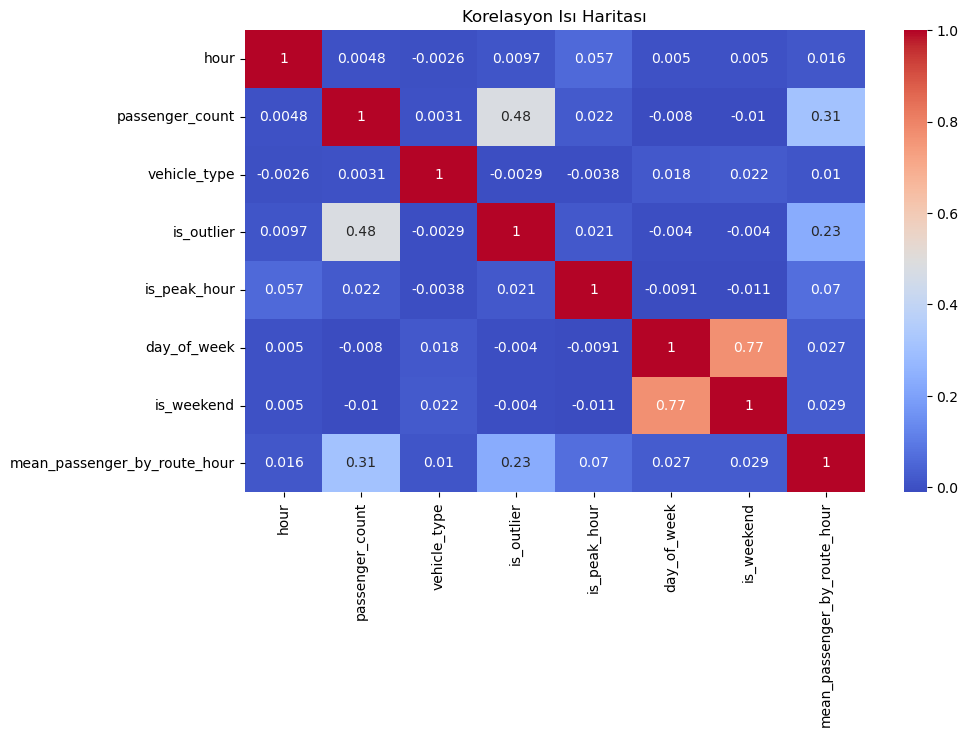

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasyon Isı Haritası")
plt.show()


Pairplot (Sample)

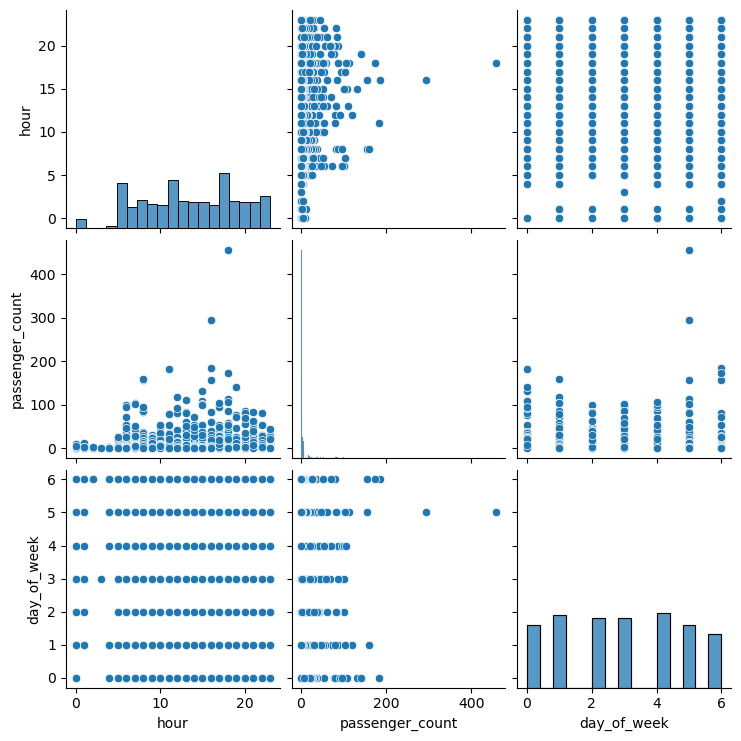

In [11]:
sns.pairplot(df.sample(3000)[["hour","passenger_count","day_of_week","month"]])
plt.show()


Weekday / Weekend Karşılaştırma

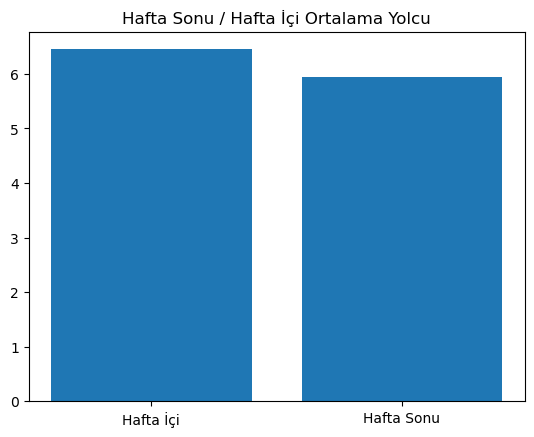

In [17]:
weekend = df.groupby("is_weekend")["passenger_count"].mean()

plt.bar(["Hafta İçi", "Hafta Sonu"], weekend.values)
plt.title("Hafta Sonu / Hafta İçi Ortalama Yolcu")
plt.show()


Saat – Gün Yoğunluk Isı Haritası

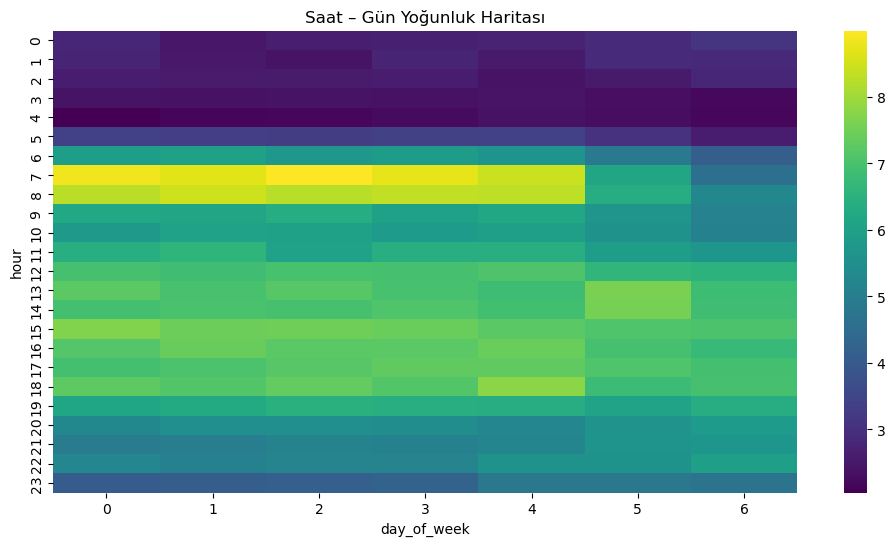

In [18]:
pivot3 = df.pivot_table(values="passenger_count",
                        index="hour",
                        columns="day_of_week",
                        aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot3, cmap="viridis")
plt.title("Saat – Gün Yoğunluk Haritası")
plt.show()


Her Ay İçin Ayrı Saatlik Yoğunluk (Facet Grid)

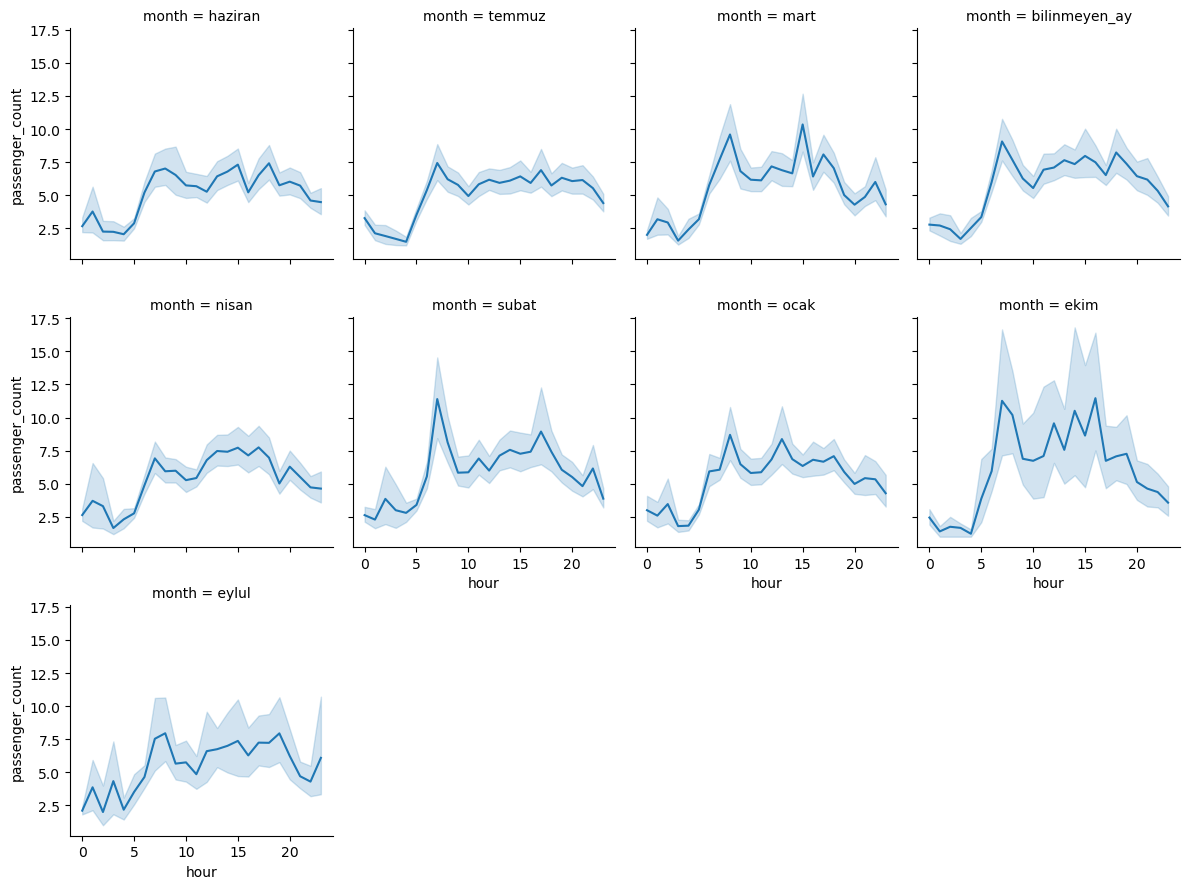

In [19]:
g = sns.FacetGrid(df.sample(150000), col="month", col_wrap=4, height=3)
g.map(sns.lineplot, "hour", "passenger_count")
plt.show()


Vehicle Type – District Boxplot

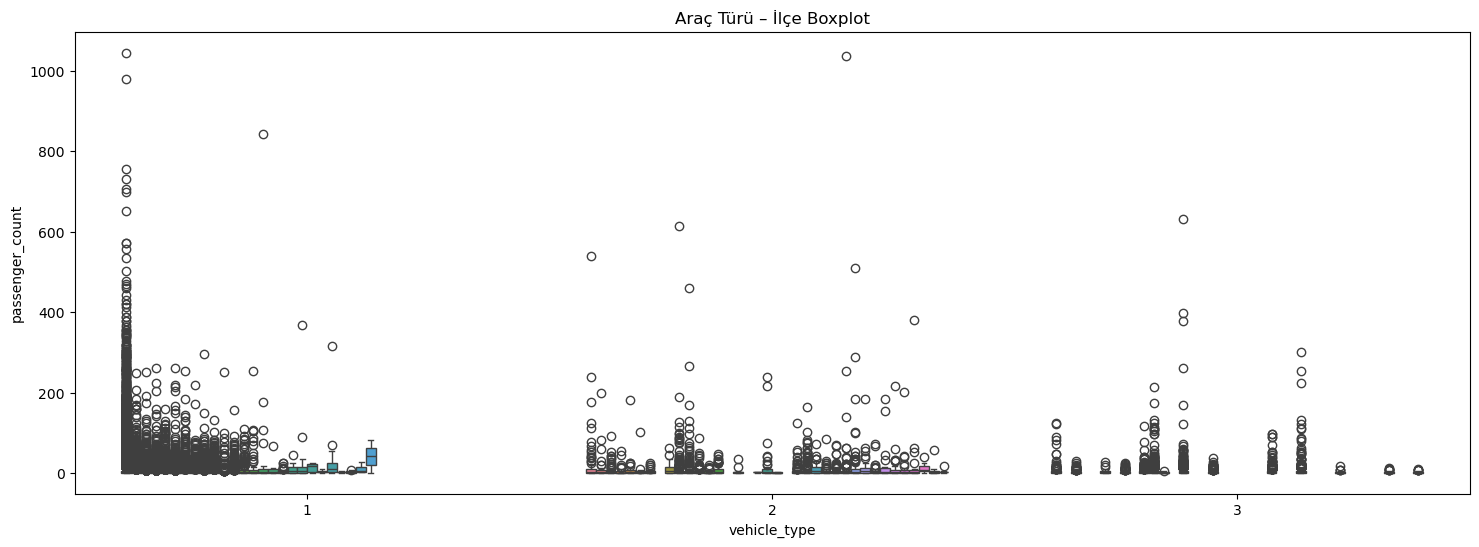

In [20]:
plt.figure(figsize=(18,6))
sns.boxplot(x="vehicle_type", y="passenger_count", hue="district", data=df.sample(80000))
plt.title("Araç Türü – İlçe Boxplot")
plt.legend([],[], frameon=False)
plt.show()


Yoğunluk Matris Grafiği (Seaborn Clustermap)

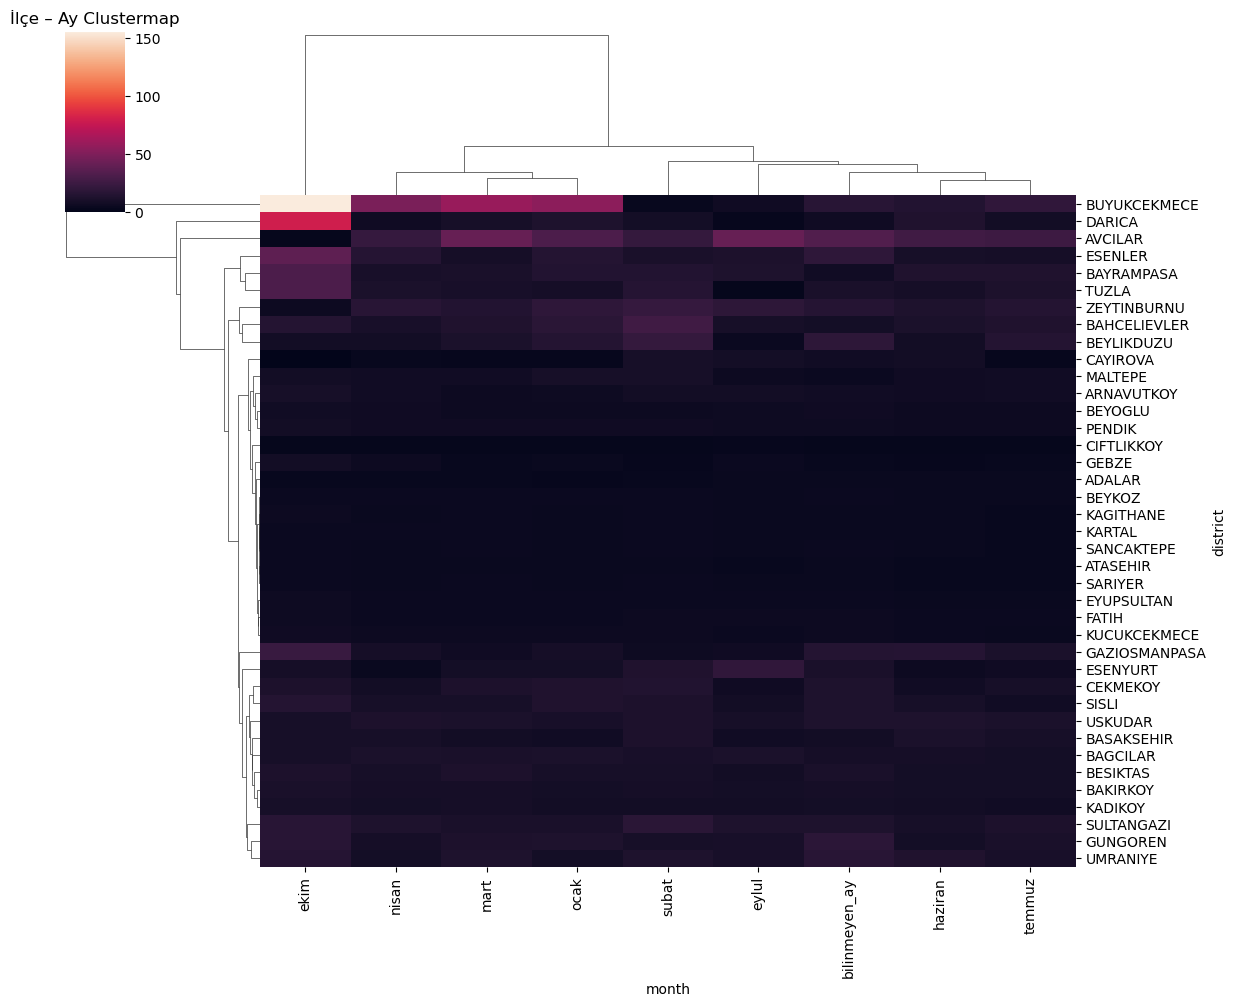

In [21]:
pivot4 = df.pivot_table(values="passenger_count",
                        index="district",
                        columns="month",
                        aggfunc="mean")

sns.clustermap(pivot4.fillna(0), cmap="rocket", figsize=(12,10))
plt.title("İlçe – Ay Clustermap")
plt.show()


Saat – Araç Türü – İlçe Kombinasyonu (3D Heatmap)

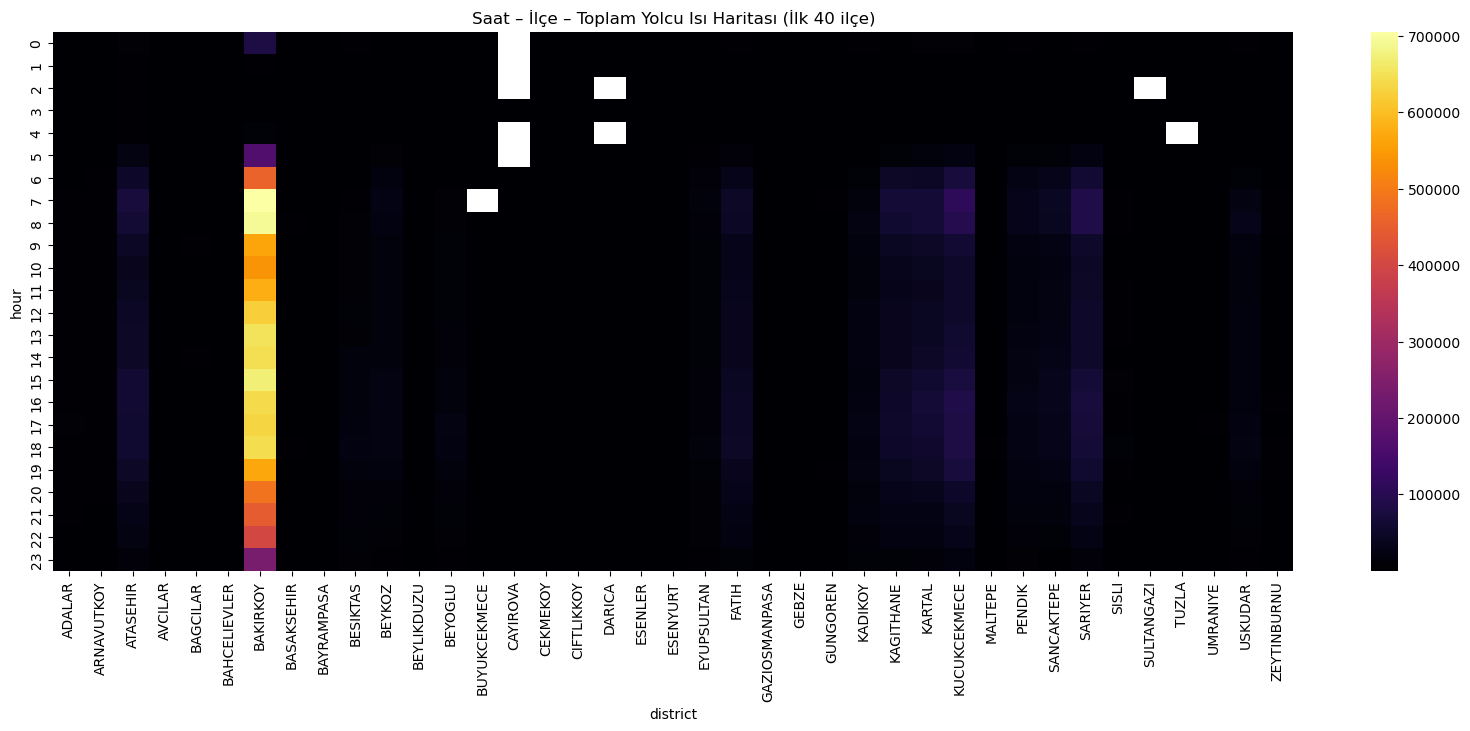

In [22]:
pivot = df.pivot_table(values="passenger_count",
                       index="hour",
                       columns="district",
                       aggfunc="sum")

plt.figure(figsize=(20,7))
sns.heatmap(pivot.iloc[:, :40], cmap="inferno")
plt.title("Saat – İlçe – Toplam Yolcu Isı Haritası (İlk 40 ilçe)")
plt.show()


Yolcu Sayısı Zaman Serisi (Date bazlı)

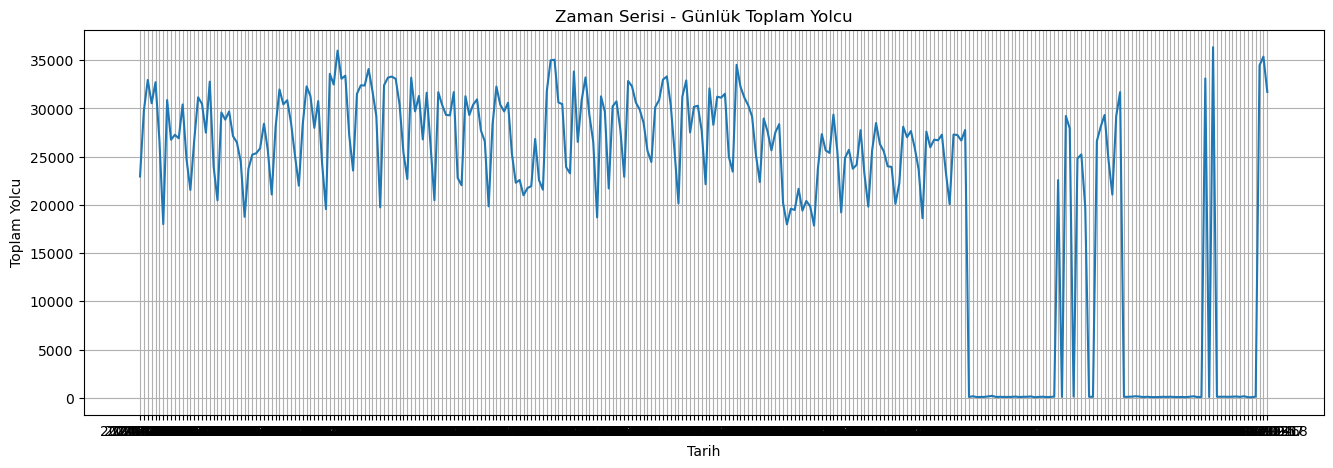

In [23]:
df2 = df.sample(1_000_000)
ts = df2.groupby("date")["passenger_count"].sum()

plt.figure(figsize=(16,5))
plt.plot(ts.index, ts.values)
plt.title("Zaman Serisi - Günlük Toplam Yolcu")
plt.xlabel("Tarih")
plt.ylabel("Toplam Yolcu")
plt.grid()
plt.show()


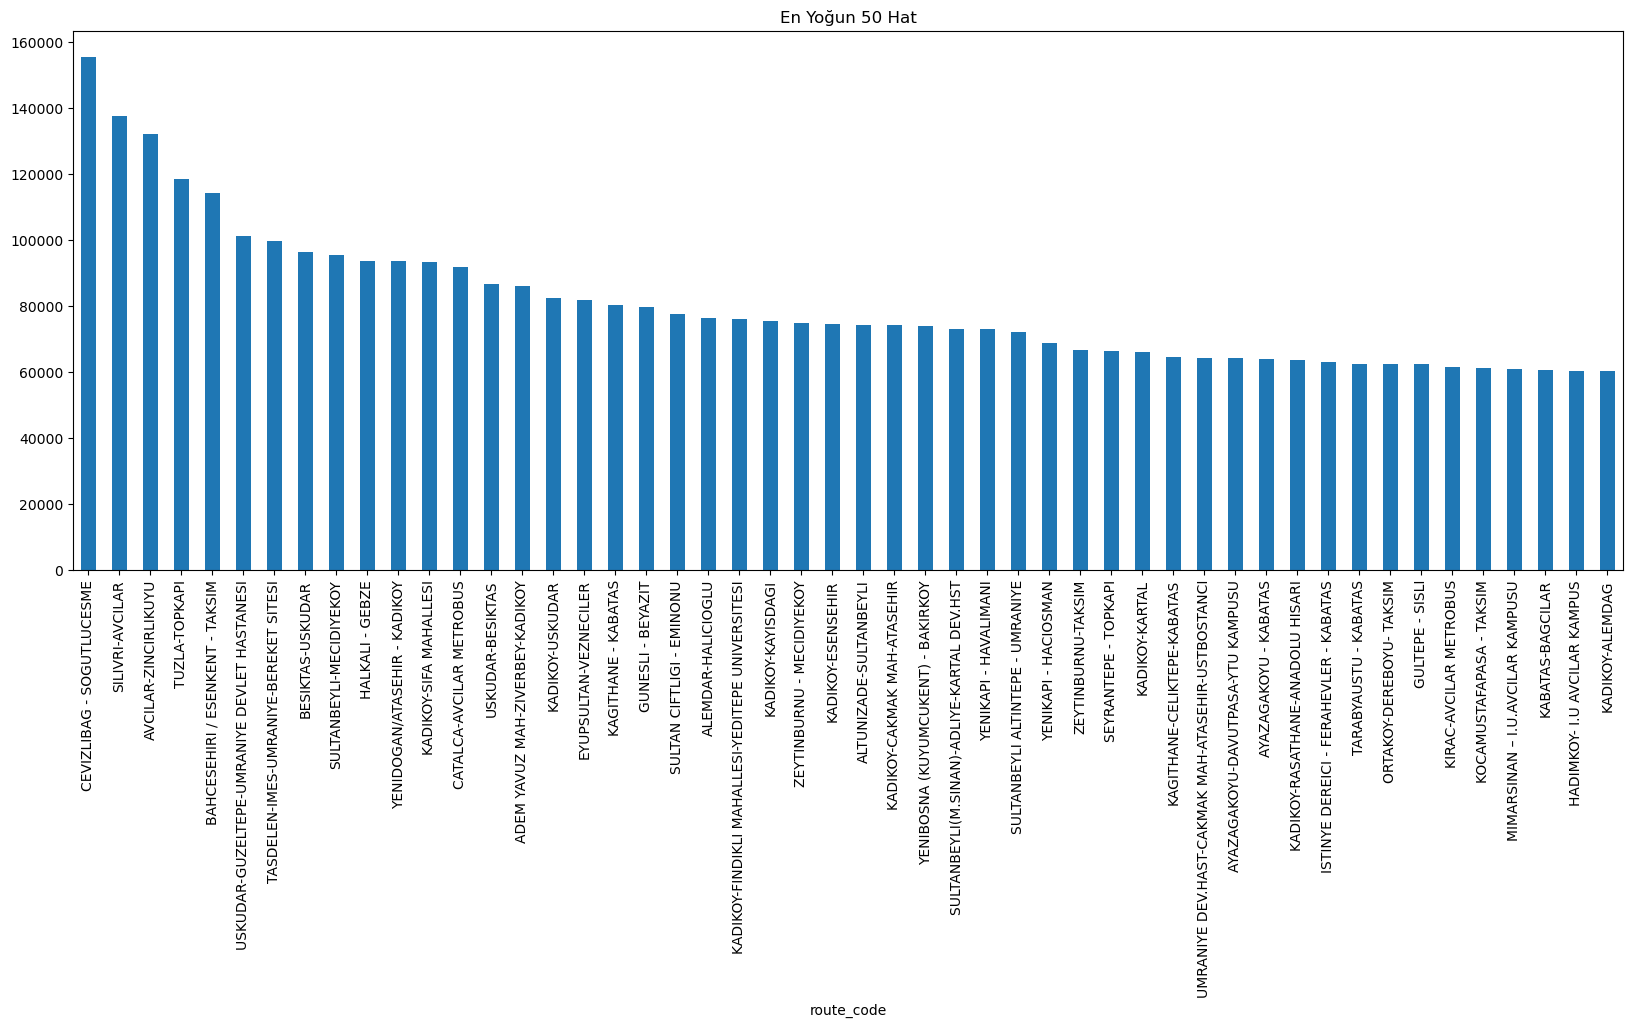

In [24]:
routes = df.groupby("route_code")["passenger_count"].sum().sort_values(ascending=False).head(50)

plt.figure(figsize=(20,7))
routes.plot(kind="bar")
plt.title("En Yoğun 50 Hat")
plt.xticks(rotation=90)
plt.show()


Yol Tipine Göre (stop_code) Yoğun Saat Grafiği

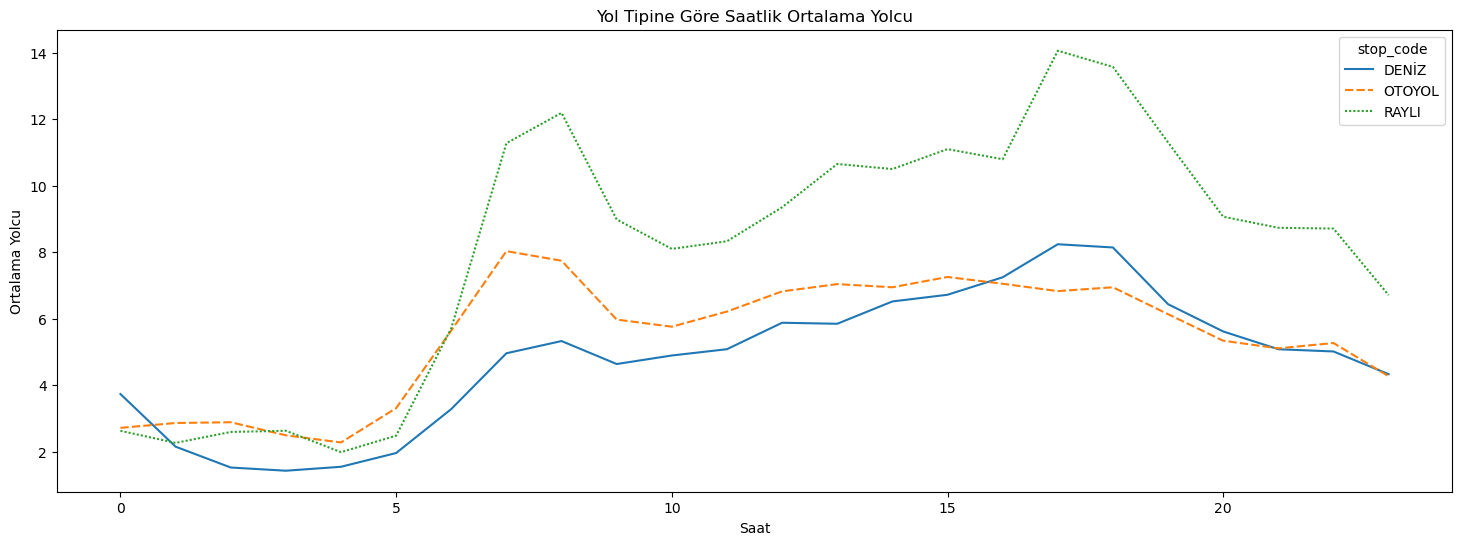

In [25]:
pivot = df.pivot_table(values="passenger_count",
                       index="hour",
                       columns="stop_code",
                       aggfunc="mean")

plt.figure(figsize=(18,6))
sns.lineplot(data=pivot)
plt.title("Yol Tipine Göre Saatlik Ortalama Yolcu")
plt.xlabel("Saat")
plt.ylabel("Ortalama Yolcu")
plt.show()


Yolcu – Araç Türü – Ay Kutu Grafiği

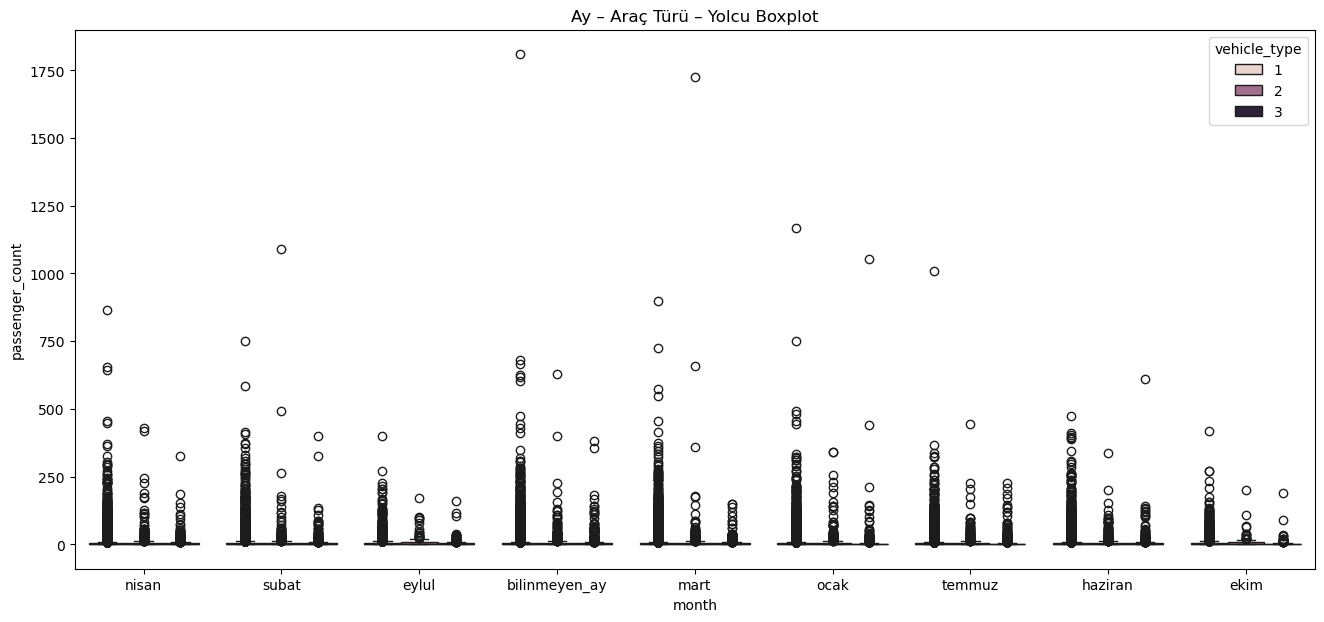

In [26]:
plt.figure(figsize=(16,7))
sns.boxplot(x="month", y="passenger_count", hue="vehicle_type",
            data=df.sample(150000))
plt.title("Ay – Araç Türü – Yolcu Boxplot")
plt.show()


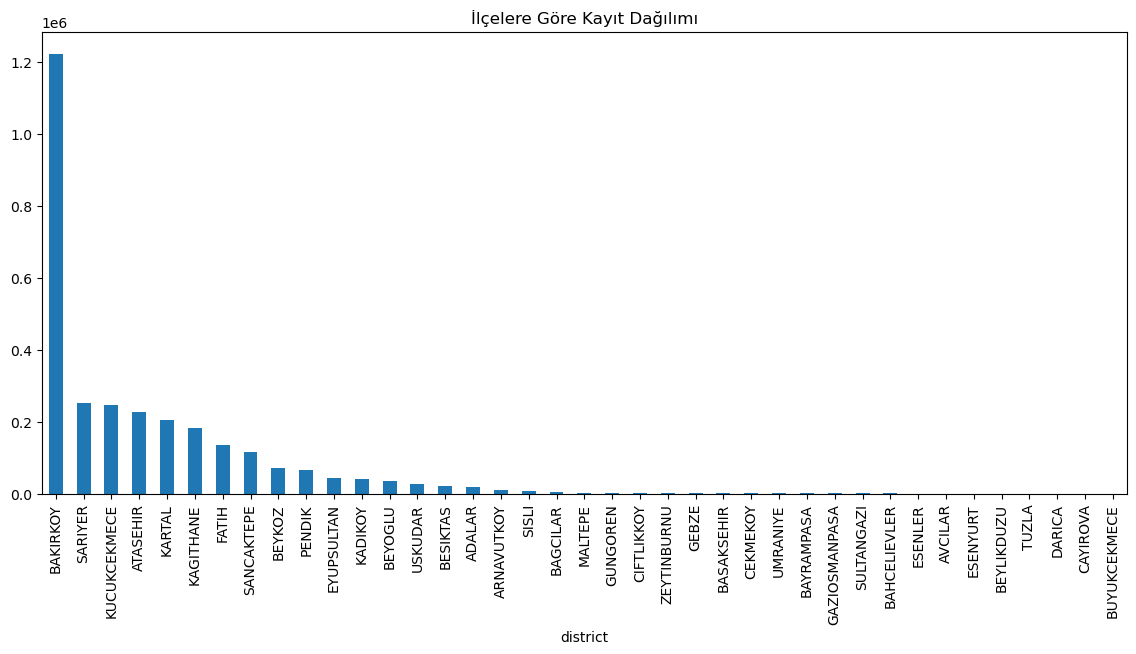

In [27]:
plt.figure(figsize=(14,6))
df['district'].value_counts().plot(kind="bar")
plt.title("İlçelere Göre Kayıt Dağılımı")
plt.xticks(rotation=90)
plt.show()


District – Month Heatmap

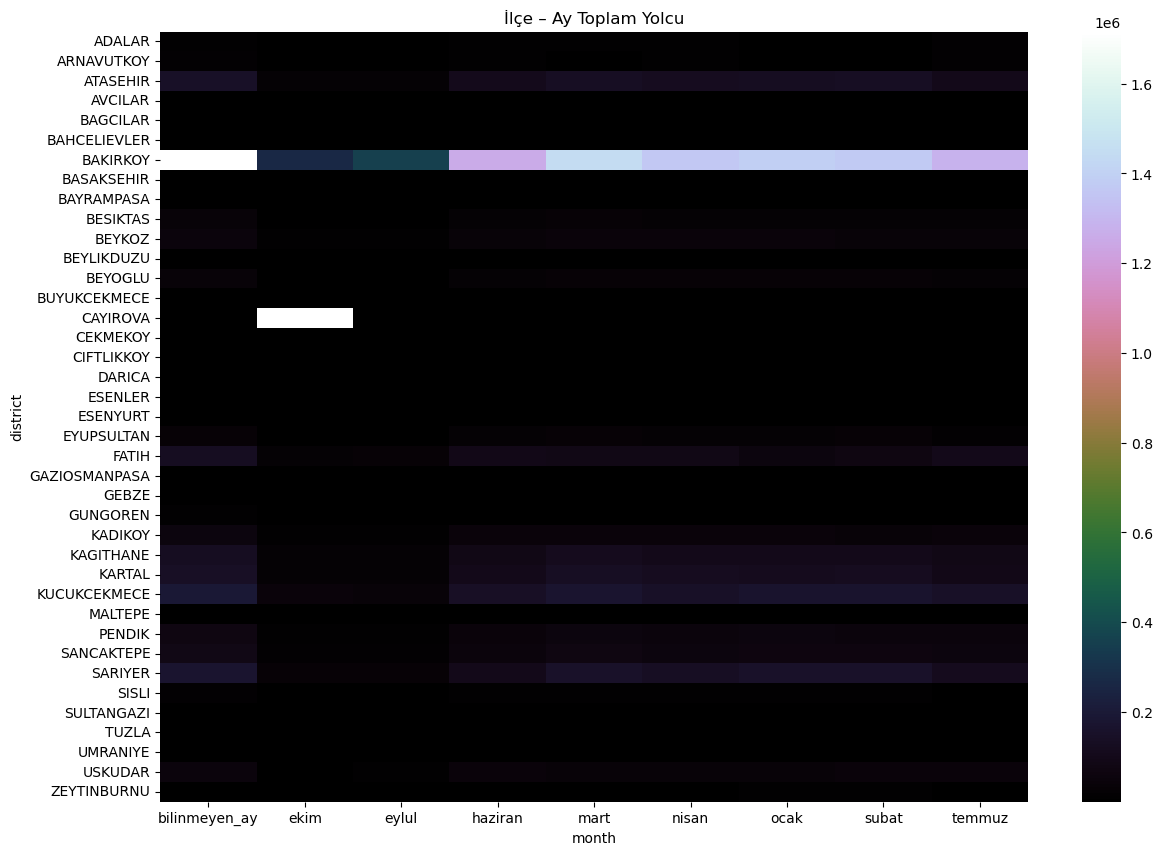

In [28]:
pivot = df.pivot_table(values="passenger_count",
                       index="district",
                       columns="month",
                       aggfunc="sum")

plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap="cubehelix")
plt.title("İlçe – Ay Toplam Yolcu")
plt.show()


Günlük Yolcu Yoğunluğu (Day of Week Histogram)

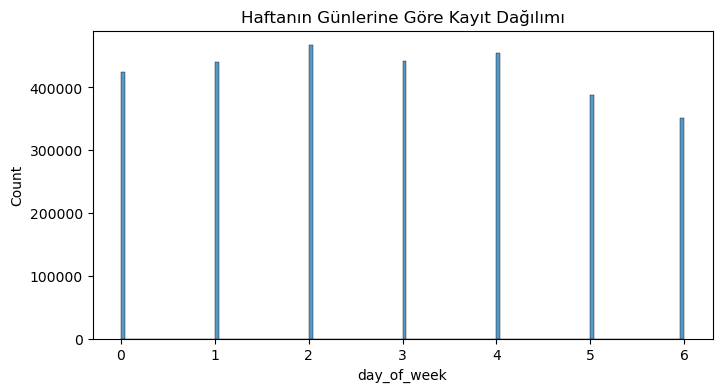

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df["day_of_week"])
plt.title("Haftanın Günlerine Göre Kayıt Dağılımı")
plt.show()


Saat – Gün – Ortalama Yolcu Lineplot

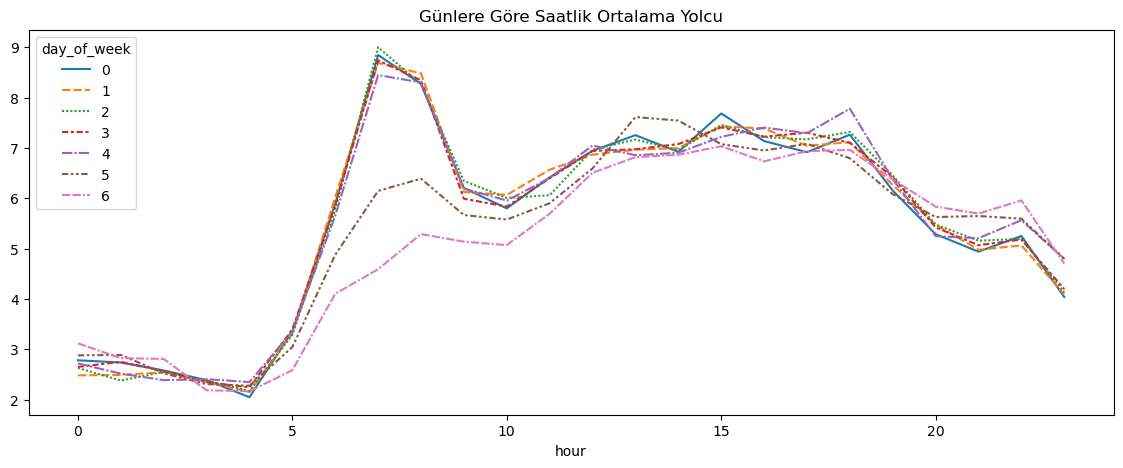

In [30]:
pivot = df.pivot_table(values="passenger_count",
                       index="hour",
                       columns="day_of_week",
                       aggfunc="mean")

plt.figure(figsize=(14,5))
sns.lineplot(data=pivot)
plt.title("Günlere Göre Saatlik Ortalama Yolcu")
plt.show()


Peak Hour – Vehicle Type Karşılaştırması

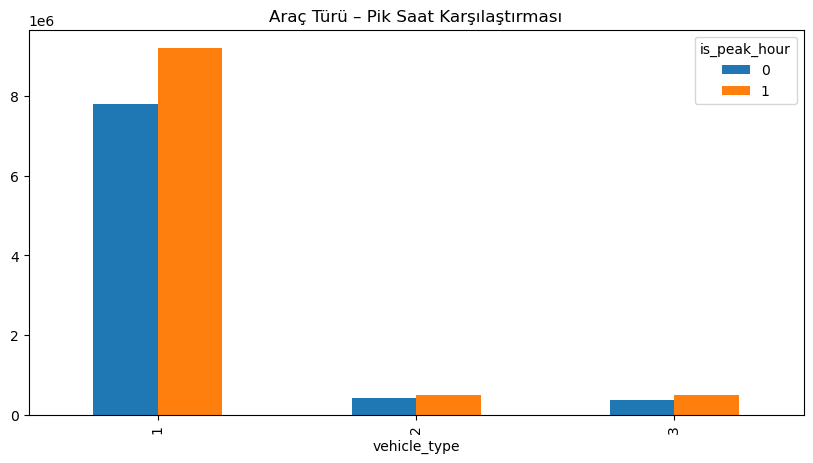

In [31]:
peak = df.groupby(["vehicle_type","is_peak_hour"])["passenger_count"].sum().unstack()

peak.plot(kind="bar", figsize=(10,5))
plt.title("Araç Türü – Pik Saat Karşılaştırması")
plt.show()


En Yoğun 30 İlçe İçin Hat Dağılımı (Countplot)

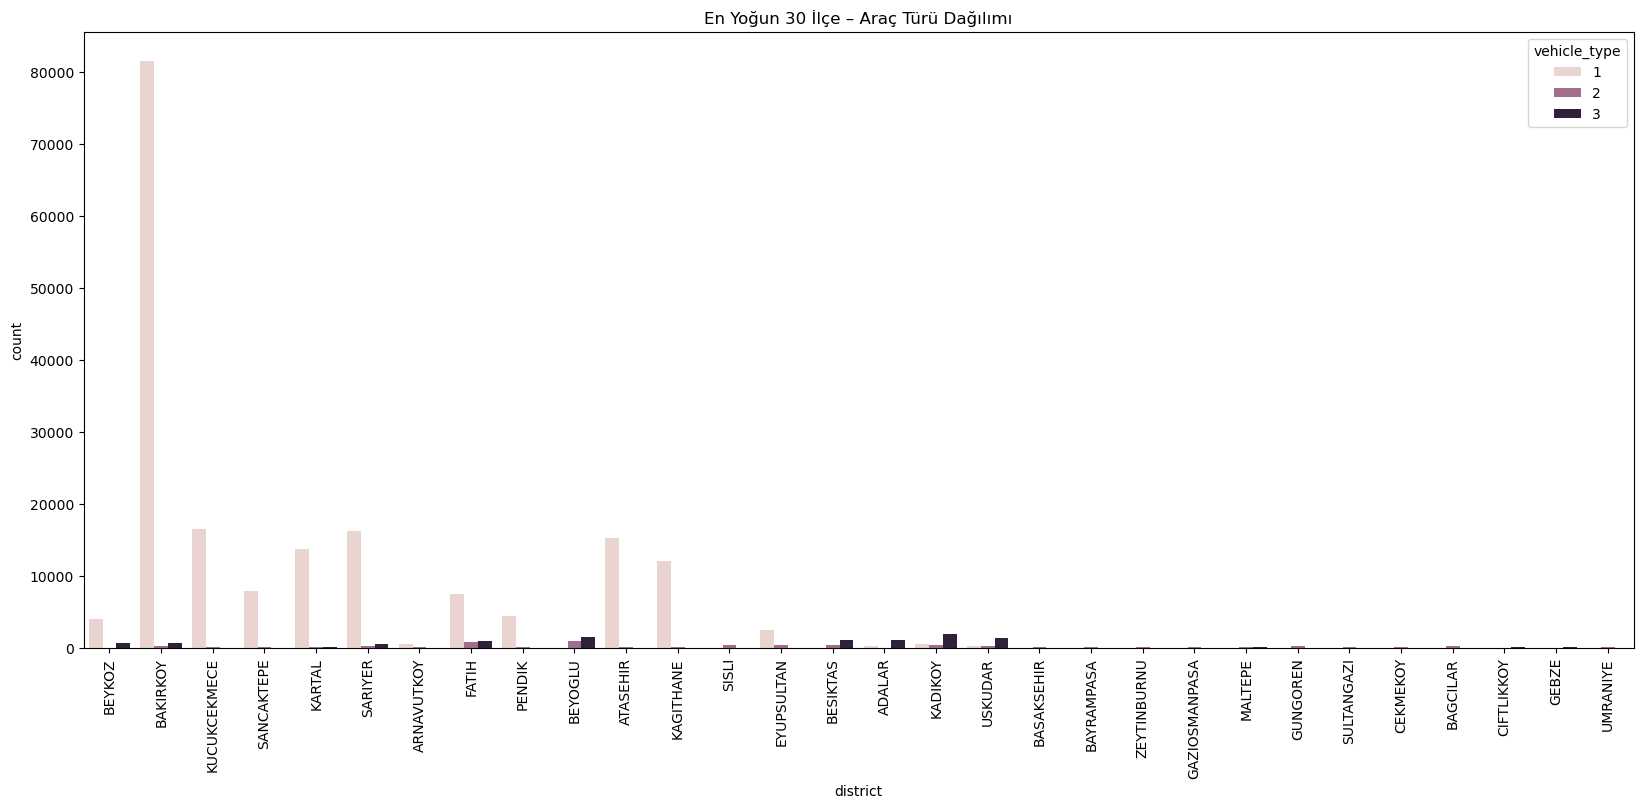

In [32]:
top30 = df['district'].value_counts().head(30).index
sample = df[df['district'].isin(top30)].sample(200000)

plt.figure(figsize=(20,8))
sns.countplot(data=sample, x="district", hue="vehicle_type")
plt.xticks(rotation=90)
plt.title("En Yoğun 30 İlçe – Araç Türü Dağılımı")
plt.show()


Scatterplot – Saat & Yolcu

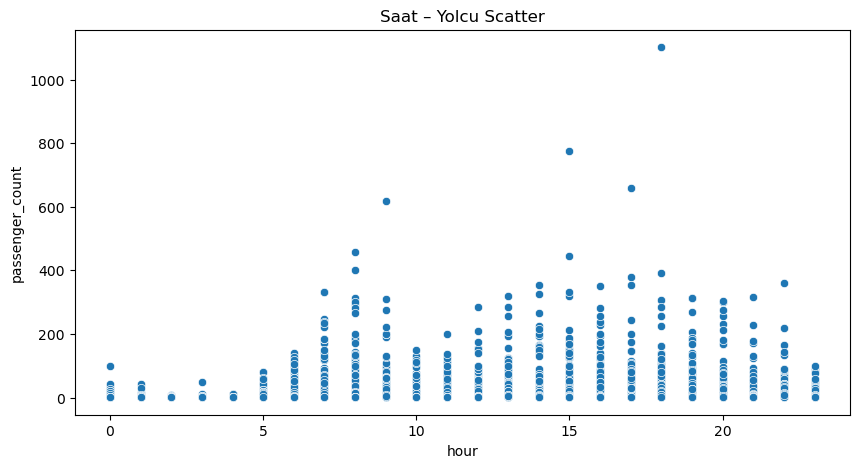

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df.sample(30000), x="hour", y="passenger_count")
plt.title("Saat – Yolcu Scatter")
plt.show()


Kategori Grafiklerinin Otomatik Üretimi (Tüm kategoriler)

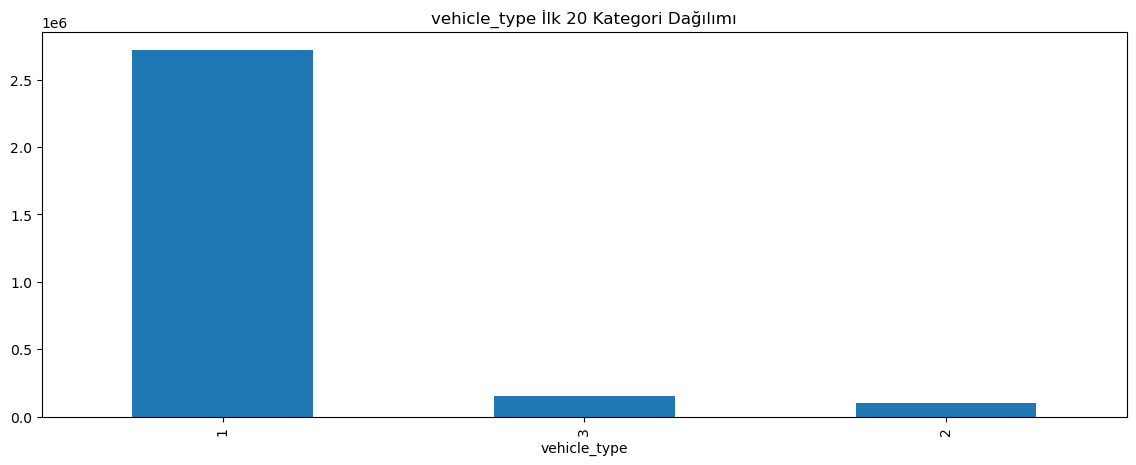

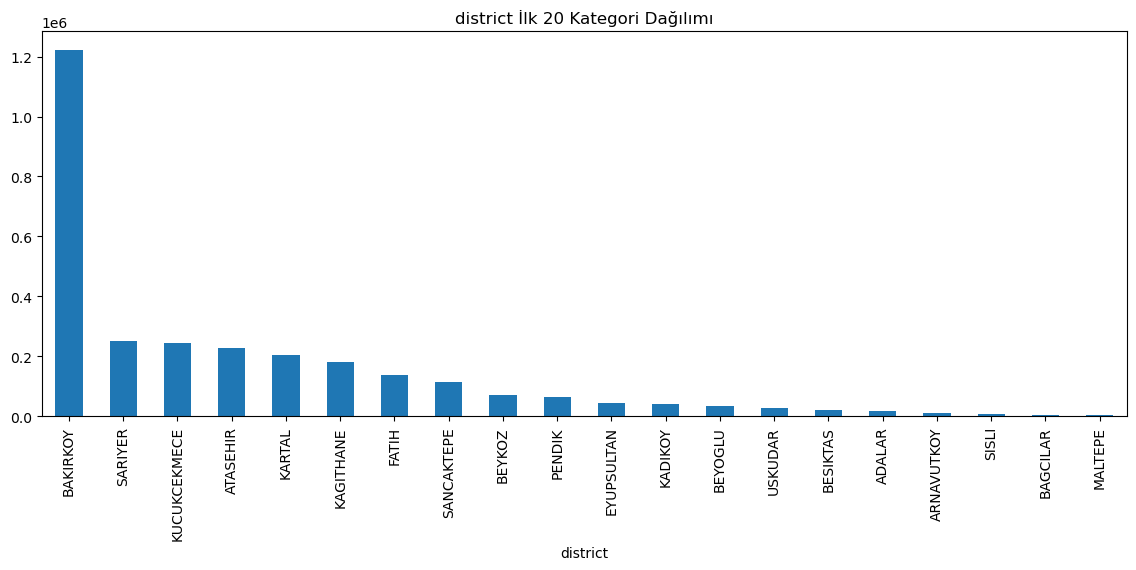

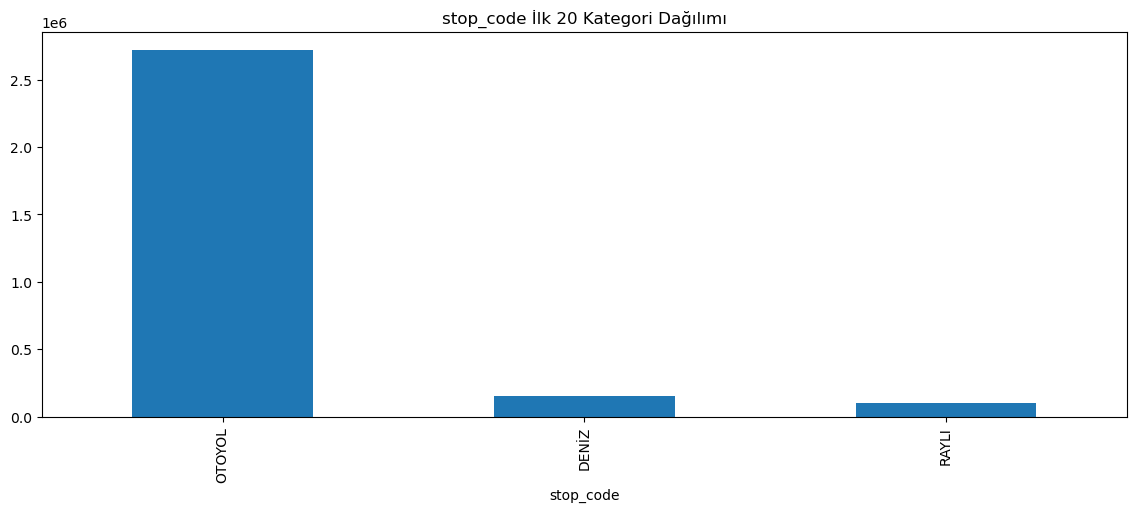

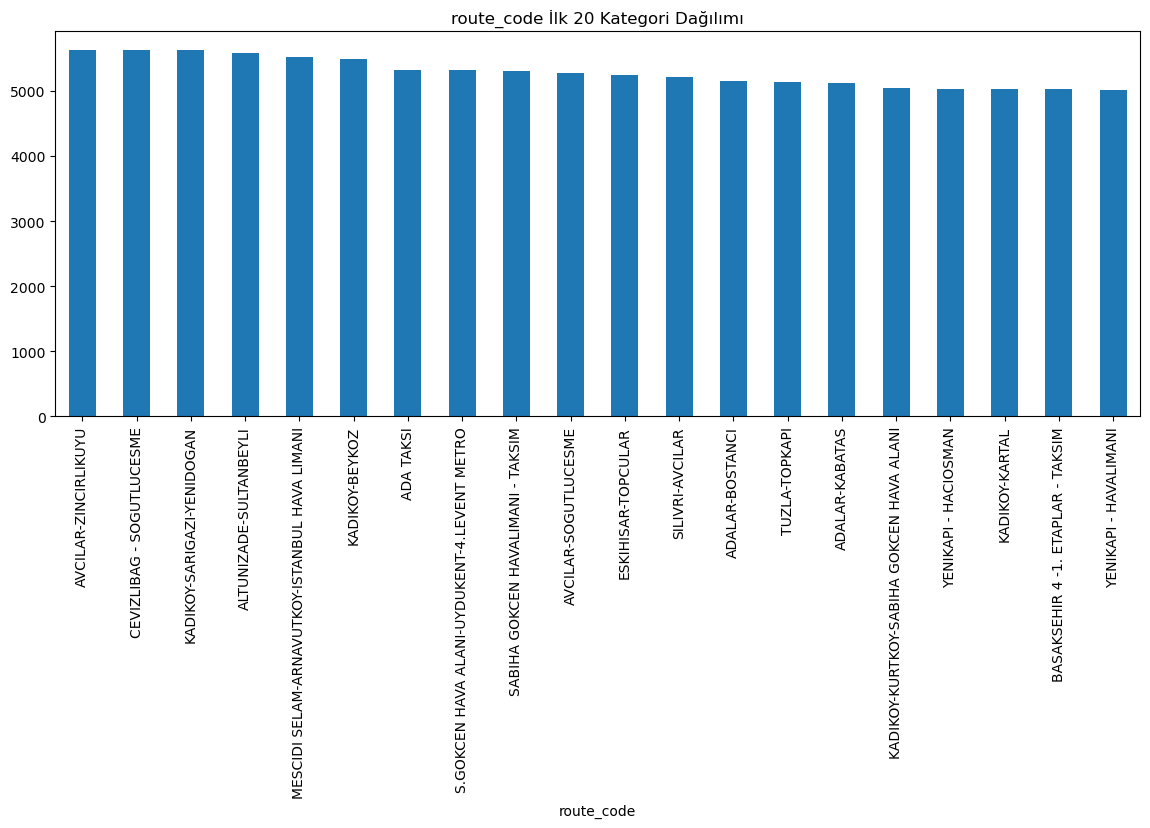

In [35]:
cat_cols = ["vehicle_type", "district", "stop_code", "route_code"]

for col in cat_cols:
    plt.figure(figsize=(14,5))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"{col} İlk 20 Kategori Dağılımı")
    plt.xticks(rotation=90)
    plt.show()


Tüm Sayısal Kolonların Boxplotu

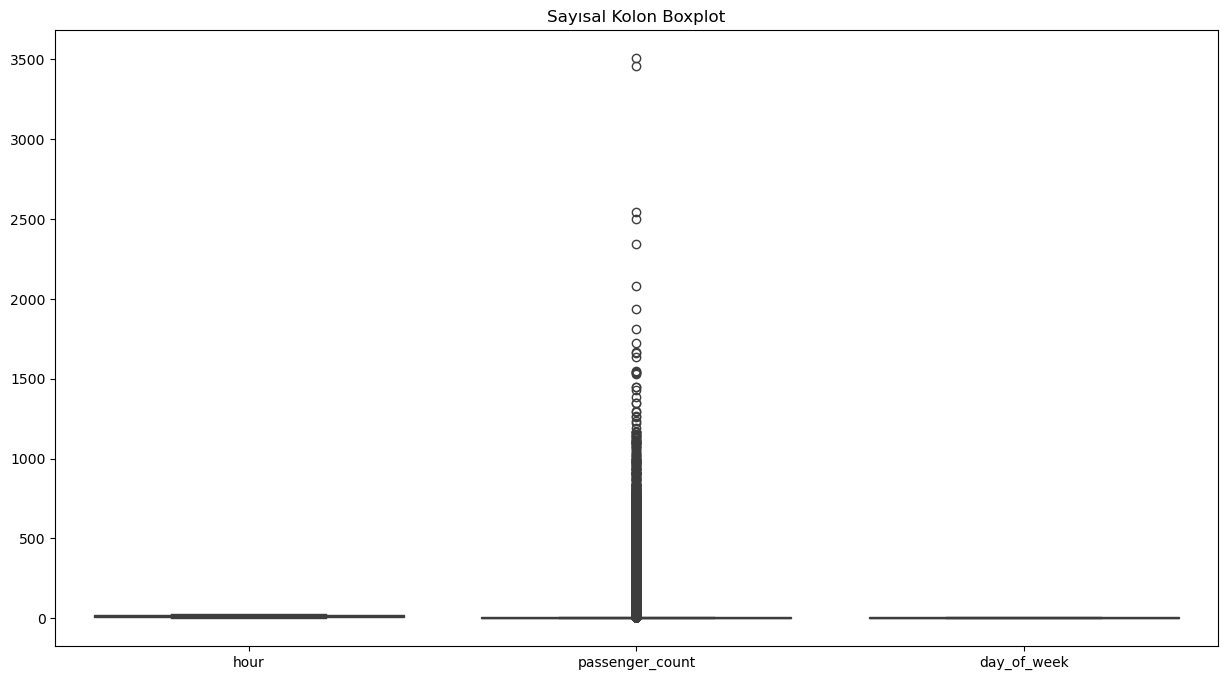

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[["hour","passenger_count","day_of_week","month"]])
plt.title("Sayısal Kolon Boxplot")
plt.show()


Weekday – Weekend Yoğunluk Karşılaştırma (Violin Plot)

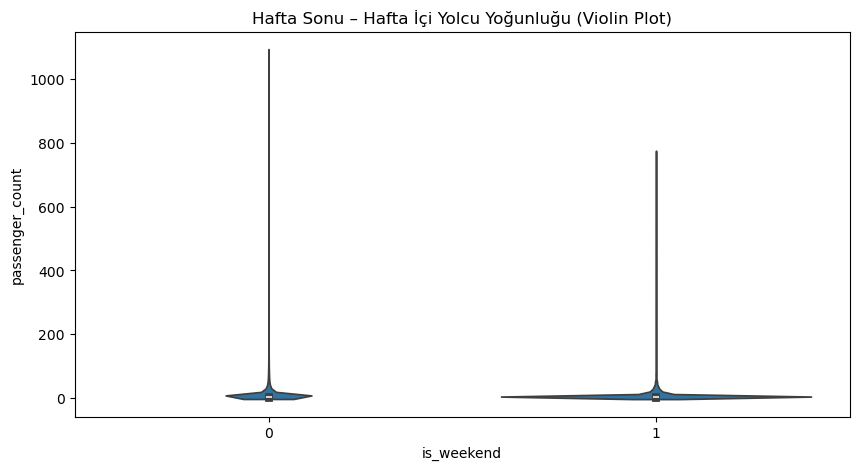

In [37]:
plt.figure(figsize=(10,5))
sns.violinplot(x="is_weekend", y="passenger_count", data=df.sample(100000))
plt.title("Hafta Sonu – Hafta İçi Yolcu Yoğunluğu (Violin Plot)")
plt.show()


Line Chart – Her Araç Türü İçin Saatlik Yoğunluk

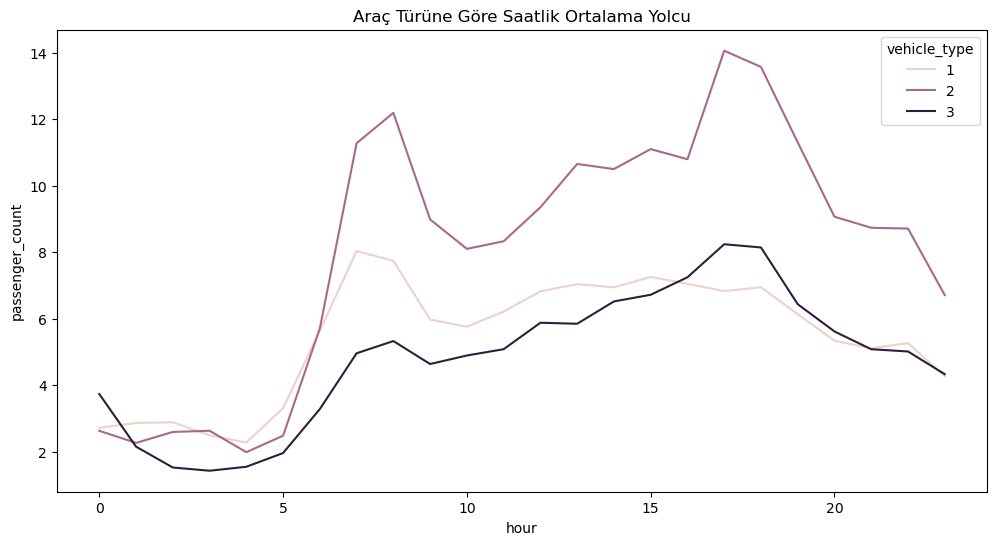

In [38]:
df2 = df.groupby(["vehicle_type","hour"])["passenger_count"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df2, x="hour", y="passenger_count", hue="vehicle_type")
plt.title("Araç Türüne Göre Saatlik Ortalama Yolcu")
plt.show()


En Yoğun 15 Hatın Yoğunluk Saat Profili

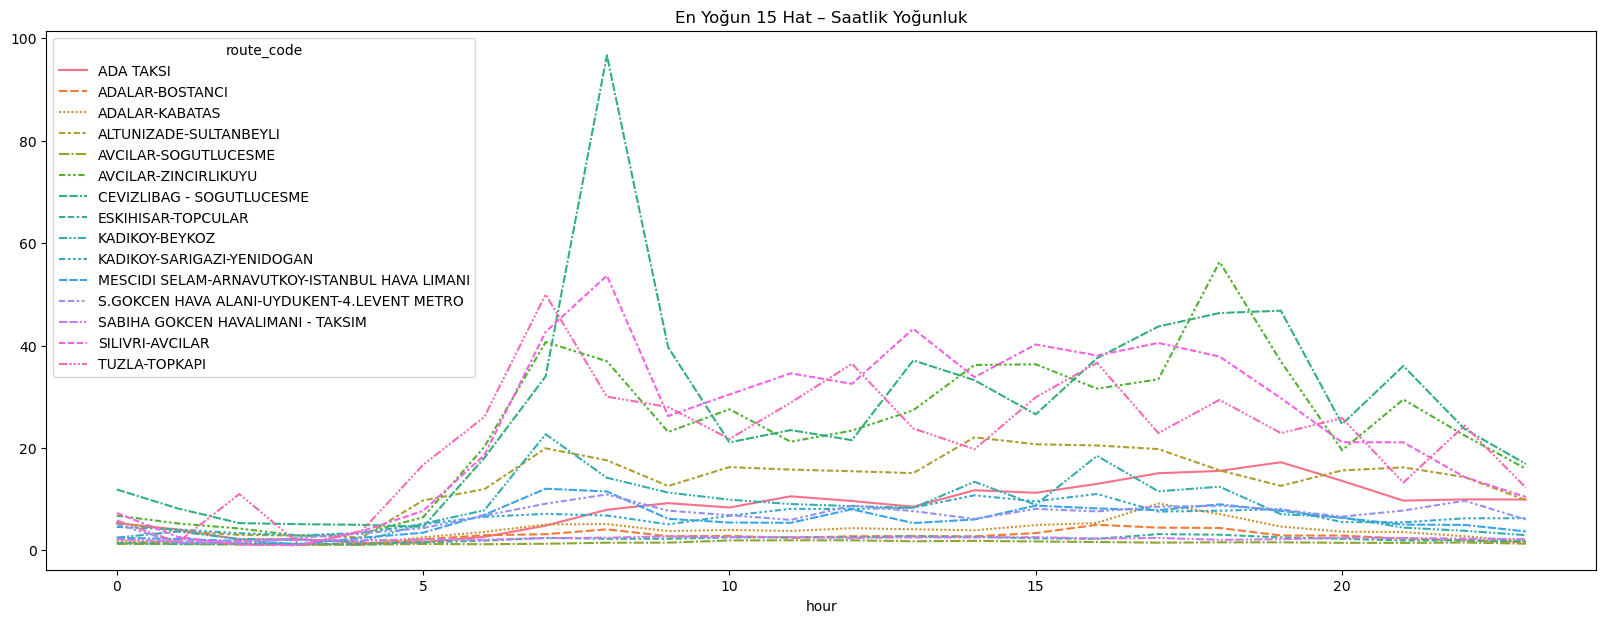

In [39]:
top15_routes = df['route_code'].value_counts().head(15).index
sample = df[df["route_code"].isin(top15_routes)]

pivot = sample.pivot_table(values="passenger_count",
                           index="hour",
                           columns="route_code",
                           aggfunc="mean")

plt.figure(figsize=(20,7))
sns.lineplot(data=pivot)
plt.title("En Yoğun 15 Hat – Saatlik Yoğunluk")
plt.show()
